In [ ]:
pip install pydataset

In [4]:
import plotnine
from plotnine import ggplot, aes
import pandas as pd

import ipywidgets
import warnings
warnings.filterwarnings('ignore')

from plotnine.data import mtcars
from vega_datasets import data as vds
from pydataset import data as pyds

import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation


%matplotlib inline

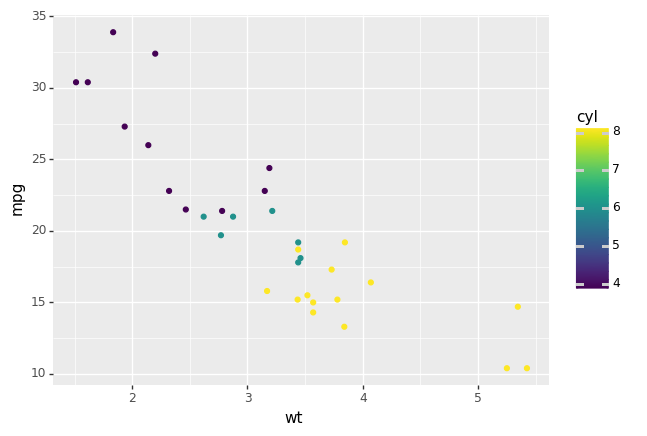

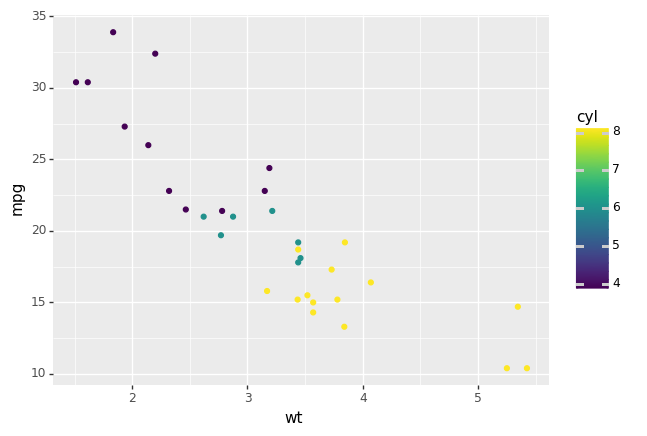

In [3]:
plotnine.qplot(x = 'wt', y='mpg', data=plotnine.data.mtcars, color = 'cyl').draw()

In [5]:
final_portfolio = pd.read_csv('../../data/cleandata/Final_Portfolio.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

final_portfolio.head(10)

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,,,
2020-03-17,252.800003,7334.779785,124.03,31.740,9.540,54.34,430.000,4.2300,252.850,1807.380,280619.12,146.57,5225.629395,113.942749
2020-03-18,240.000000,6989.839844,101.89,23.485,7.140,43.02,361.600,3.7800,249.000,1832.390,258927.00,142.13,5238.438477,114.842270
2020-03-19,240.509995,7150.580078,97.71,21.500,7.700,46.57,427.295,4.1900,244.780,1880.500,261690.00,142.67,6191.192871,136.593857
2020-03-20,228.800003,6879.520020,95.01,21.350,9.110,51.97,427.530,3.7550,228.740,1846.090,254600.00,136.77,6198.778320,132.737167
2020-03-23,222.949997,6860.669922,105.49,22.230,9.150,57.56,434.290,3.8100,223.430,1902.540,242000.00,135.56,6416.314941,134.911606
2020-03-24,243.149994,7417.859863,127.50,26.890,12.185,66.54,504.300,4.1950,246.880,1940.000,267090.00,148.34,6734.803711,138.761444
2020-03-25,246.789993,7384.299805,158.68,31.140,12.945,75.06,539.175,4.2000,245.465,1885.780,269409.75,146.85,6681.062988,136.195892
2020-03-26,261.200012,7797.540039,180.40,31.700,13.410,71.40,528.050,4.4050,258.480,1955.225,276095.00,156.11,6716.440430,138.361557
2020-03-27,253.419998,7502.379883,161.99,29.550,12.180,63.31,514.560,4.2101,247.620,1899.920,269350.00,149.61,6469.798340,133.937943


In [7]:
investment_portfolio = final_portfolio[['BA', 'DAL', 'MGM', 'WYNN', 'Tesla', 'Gamestop', 'AAPL', 'AMZN', 'BRK.A', 'MSFT', 'BTC', 'ETH']]

investment_portfolio.head(10)

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,
2020-03-17,124.03,31.740,9.540,54.34,430.000,4.2300,252.850,1807.380,280619.12,146.57,5225.629395,113.942749
2020-03-18,101.89,23.485,7.140,43.02,361.600,3.7800,249.000,1832.390,258927.00,142.13,5238.438477,114.842270
2020-03-19,97.71,21.500,7.700,46.57,427.295,4.1900,244.780,1880.500,261690.00,142.67,6191.192871,136.593857
2020-03-20,95.01,21.350,9.110,51.97,427.530,3.7550,228.740,1846.090,254600.00,136.77,6198.778320,132.737167
2020-03-23,105.49,22.230,9.150,57.56,434.290,3.8100,223.430,1902.540,242000.00,135.56,6416.314941,134.911606
2020-03-24,127.50,26.890,12.185,66.54,504.300,4.1950,246.880,1940.000,267090.00,148.34,6734.803711,138.761444
2020-03-25,158.68,31.140,12.945,75.06,539.175,4.2000,245.465,1885.780,269409.75,146.85,6681.062988,136.195892
2020-03-26,180.40,31.700,13.410,71.40,528.050,4.4050,258.480,1955.225,276095.00,156.11,6716.440430,138.361557
2020-03-27,161.99,29.550,12.180,63.31,514.560,4.2101,247.620,1899.920,269350.00,149.61,6469.798340,133.937943


In [8]:
investment_portfolio.columns = pd.MultiIndex.from_tuples(
    zip(investment_portfolio.columns, ['close','close', 'close','close', 'close','close', 'close','close', 'close','close', 'close','close']
        ))

investment_portfolio.head()

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
,close,close,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,,,
2020-03-17,124.03,31.740,9.54,54.34,430.000,4.230,252.85,1807.38,280619.12,146.57,5225.629395,113.942749
2020-03-18,101.89,23.485,7.14,43.02,361.600,3.780,249.00,1832.39,258927.00,142.13,5238.438477,114.842270
2020-03-19,97.71,21.500,7.70,46.57,427.295,4.190,244.78,1880.50,261690.00,142.67,6191.192871,136.593857
2020-03-20,95.01,21.350,9.11,51.97,427.530,3.755,228.74,1846.09,254600.00,136.77,6198.778320,132.737167
2020-03-23,105.49,22.230,9.15,57.56,434.290,3.810,223.43,1902.54,242000.00,135.56,6416.314941,134.911606


In [9]:
MC_even_dist = MCSimulation(
    portfolio_data = investment_portfolio,
    weights = [.0625, .0625, .0625, .0625, .0625, .0625, .125, .125, .125, .125, .0625, .0625],
    num_simulation = 1000,
    num_trading_days = 252*1
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

BA                  DAL                MGM               \
             close daily_return   close daily_return close daily_return   
Date                                                                      
2020-03-17  124.03          NaN  31.740          NaN  9.54          NaN   
2020-03-18  101.89    -0.178505  23.485    -0.260082  7.14    -0.251572   
2020-03-19   97.71    -0.041025  21.500    -0.084522  7.70     0.078431   
2020-03-20   95.01    -0.027633  21.350    -0.006977  9.11     0.183117   
2020-03-23  105.49     0.110304  22.230     0.041218  9.15     0.004391   

             WYNN                 Tesla               ...     AMZN  \
            close daily_return    close daily_return  ...    close   
Date                                                  ...            
2020-03-17  54.34          NaN  430.000          NaN  ...  1807.38   
2020-03-18  43.02    -0.208318  361.600    -0.159070  ...  1832.39   
2020-03-19  46.57     0.082520  427.295     0.181679  ...  1880.50   
2020-03-20  51.97     0.115954  427.530     0.000550  ...  1846.09   
2020-03-23  57.56     0.107562  434.290     0.015812  ...  1902.54   

                             BRK.A                 MSFT               \
           daily_return      close daily_return   close daily_return   
Date                                                                   
2020-03-17          NaN  280619.12          NaN  146.57          NaN   
2020-03-18     0.013838  258927.00    -0.077301  142.13    -0.030293   
2020-03-19     0.026255  261690.00     0.010671  142.67     0.003799   
2020-03-20    -0.018298  254600.00    -0.027093  136.77    -0.041354   
2020-03-23     0.030578  242000.00    -0.049489  135.56    -0.008847   

                    BTC                      ETH               
                  close daily_return       close daily_return  
Date                                                           
2020-03-17  5225.629395          NaN  113.942749          NaN  
2020-03-18  5238.438477     0.002451  114.842270     0.007894  
2020-03-19  6191.192871     0.181878  136.593857     0.189404  
2020-03-20  6198.778320     0.001225  132.737167    -0.028235  
2020-03-23  6416.314941     0.035093  134.911606     0.016382  

[5 rows x 24 columns]

In [13]:
line_plot = ggplot(data = investment_portfolio, mapping = aes(x='Date', y='DAL'))